In [19]:
import os
import torch
import torch.fft
import torchaudio
import IPython.display as ipd
from IPython.display import Audio
import matplotlib.pyplot as plt


ORIGINAL_FILE = "C:/Users/samue/Documents/Sam's School/GitHub/Audio-Undistortion/training/prepared_data/clean/0_0_1462-170142-0000.flac_16.0khz_24.0kframes.wav"
TEST_FILE = "C:/Users/samue/Documents/Sam's School/GitHub/Audio-Undistortion/training/prepared_data/noisy/distorted_0_0_1462-170142-0000.flac_16.0khz_24.0kframes.wav"
AUDIO_NET_FILE = "C:/Users/samue/Documents/Sam's School/GitHub/Audio-Undistortion/training/saved_models/AudioNet_MSELoss_1000_slower_rate_higher_decay_higher_eps.pth"

# OUTPUT_UNDISTORTED_TEST_FILE = "C:/Users/samue/Documents/Sam's School/GitHub/Audio-Undistortion/tests/undistorted_test_file.wav"

original_audio, sample_rate = torchaudio.load(ORIGINAL_FILE)
noisy_audio, sample_rate = torchaudio.load(TEST_FILE)

audio_net = torch.load(AUDIO_NET_FILE)
noisy_audio = noisy_audio.to("cuda")
output_audio = audio_net(noisy_audio)

noisy_audio = noisy_audio.detach().to("cpu")
output_audio = output_audio.detach().to("cpu")

original_audio_fft = torch.fft.fft(original_audio)
noisy_audio_fft = torch.fft.fft(noisy_audio)
output_audio_fft = torch.fft.fft(output_audio)

ipd.display(Audio(original_audio.numpy(), rate=sample_rate))
ipd.display(Audio(noisy_audio.numpy(), rate=sample_rate))
ipd.display(Audio(output_audio.numpy(), rate=sample_rate))


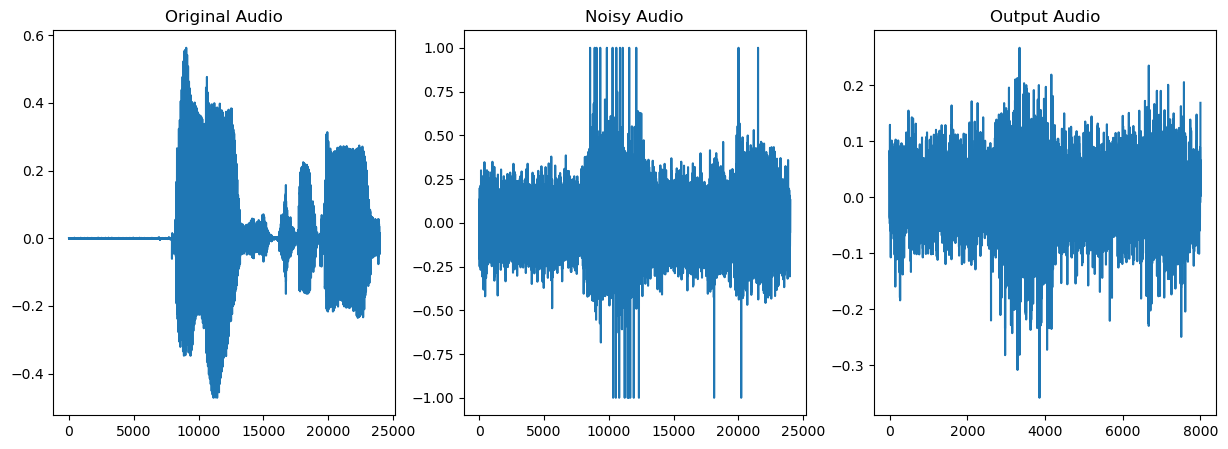

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(original_audio.t().numpy())
axs[0].set_title('Original Audio')

axs[1].plot(noisy_audio.t().numpy())
axs[1].set_title('Noisy Audio')

axs[2].plot(output_audio.t().numpy())
axs[2].set_title('Output Audio')

plt.show()


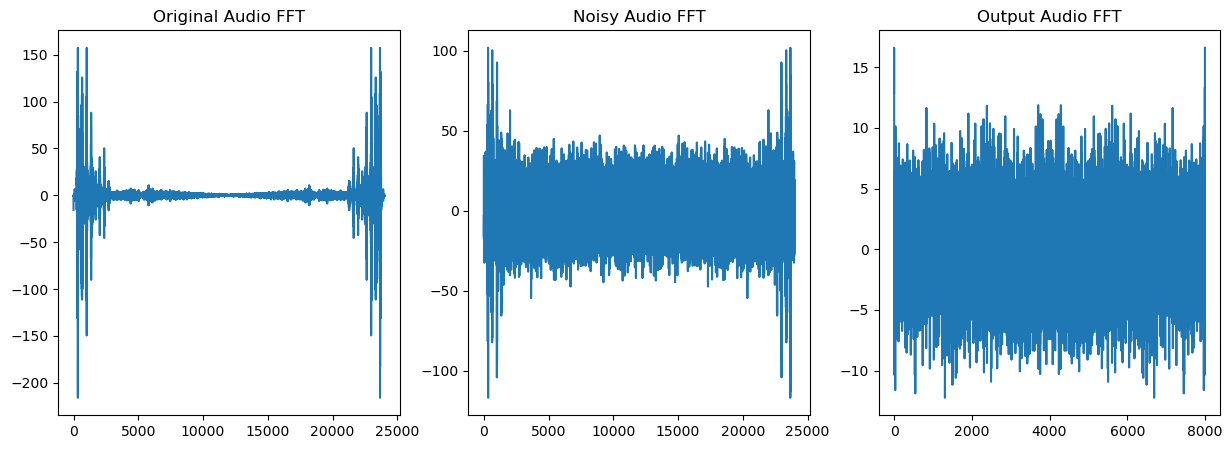

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(original_audio_fft.t().numpy())
axs[0].set_title('Original Audio FFT')

axs[1].plot(noisy_audio_fft.t().numpy())
axs[1].set_title('Noisy Audio FFT')

axs[2].plot(output_audio_fft.t().numpy())
axs[2].set_title('Output Audio FFT')

plt.show()

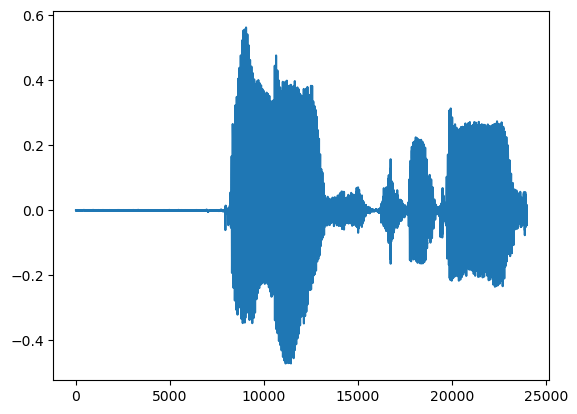

In [22]:
plt.plot(original_audio.t().numpy())
plt.show()

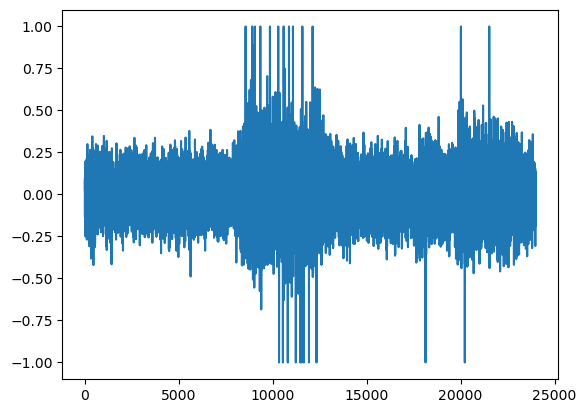

In [23]:
plt.plot(noisy_audio.t().numpy())
plt.show()

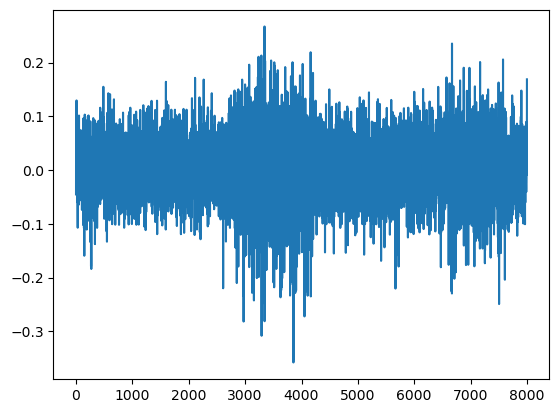

In [24]:
plt.plot(output_audio.t().numpy())
plt.show()